# Clustering Lab

 
Based of the amazing work you did in the Movie Industry you've been recruited to the NBA! You are working as the VP of Analytics that helps support a head scout, Mr. Rooney, for the worst team in the NBA probably the Wizards. Mr. Rooney just heard about Data Science and thinks it can solve all the team's problems!!! He wants you to figure out a way to find players that are high performing but maybe not highly paid that you can steal to get the team to the playoffs! 

In this document you will work through a similar process that we did in class with the NBA data (NBA_Perf_22 and nba_salaries_22), merging them together.

Details: 

- Determine a way to use clustering to estimate based on performance if 
players are under or over paid, generally. 

- Then select players you believe would be best for your team and explain why. Do so in three categories: 
    * Examples that are not good choices (3 or 4) 
    * Several options that are good choices (3 or 4)
    * Several options that could work, assuming you can't get the players in the good category (3 or 4)

- You will decide the cutoffs for each category, so you should be able to explain why you chose them.

- Provide a well commented and clean report of your findings in a separate notebook that can be presented to Mr. Rooney, keeping in mind he doesn't understand...anything. Include a rationale for variables you included in the model, details on your approach and a overview of the results with supporting visualizations. 


Hints:

- Salary is the variable you are trying to understand 
- When interpreting you might want to use graphs that include variables that are the most correlated with Salary
- You'll need to scale the variables before performing the clustering
- Be specific about why you selected the players that you did, more detail is better
- Use good coding practices, comment heavily, indent, don't use for loops unless totally necessary and create modular sections that align with some outcome. If necessary create more than one script,list/load libraries at the top and don't include libraries that aren't used. 
- Be careful for non-traditional characters in the players names, certain graphs won't work when these characters are included.


In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score

In [8]:
NBA_perf = pd.read_csv('../data/NBA_Perf_22.csv', encoding="latin1")
NBA_salary = pd.read_csv('../data/nba_salaries_22.csv', encoding="latin1")

In [9]:
# Merging the two datasets
NBA = pd.merge(NBA_perf, NBA_salary, how='inner', left_on='Player', right_on='ï»¿Player')
NBA['Salary'] = NBA['Salary'].str.replace('$', '').str.replace(',', '').astype(float)
NBA.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ï»¿Player,Salary
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,Precious Achiuwa,2840160.0
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,Steven Adams,17926829.0
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,Bam Adebayo,30351780.0
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,Santi Aldama,2094120.0
4,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,0.372,...,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,Nickeil Alexander-Walker,5009633.0


In [10]:
#Drop variables that will not be needed or are duplicates
def drop_columns(df):
     # Dropping all repetitive columns
     df = df.drop(columns=['GS', 'FGA', 'FG%', '3PA', '3P%', '2PA', '2P%', 'FTA', 'FT%', 'ORB', 'DRB'])  
     df = df.dropna()

     # Dropping duplicates
     df = df.drop_duplicates(subset = ['Player'], keep = 'last')
     return df

NBA = drop_columns(NBA)

In [21]:
#Run the clustering algo with your best guess for K
clust_data1 = NBA[["FG", "AST", "TRB"]]
kmeans_obj1 = KMeans(n_clusters=2, random_state=1).fit(clust_data1)

In [22]:
#View the results
print("Results:")
print(kmeans_obj1.cluster_centers_)
print(kmeans_obj1.labels_)
print(kmeans_obj1.inertia_)

Results:
[[6.55321101 4.23211009 6.49357798]
 [2.78718861 1.57188612 3.20640569]]
[1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1
 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0]
2911.0647445231634


In [23]:
#Create a visualization of the results with 2 or 3 variables that you think will best
#differentiate the clusters

fig = px.scatter_3d(NBA, x='FG', y='AST', z='TRB', color=kmeans_obj1.labels_,
                     title='NBA Players Clustering',
                     labels={'FG': 'Field Goals', 'AST': 'Assists', 'TRB': 'Total Rebounds'},
                     color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()

In [24]:
#Evaluate the quality of the clustering using total variance explained and silhouette scores
print("Cluster Evaluation:")
# Total Variance Explained and Silhouette Score for the Center, Point Forward, and Shooting Forward
# Total Variance Explained
total_sum_squares = np.sum((clust_data1 - np.mean(clust_data1))**2)
total = np.sum(total_sum_squares)
between_SSE = (total-kmeans_obj1.inertia_)
var_explained = between_SSE/total
print(f'Total Variance Explained: {var_explained}')
# Silhouette Score
silhouette_avg = silhouette_score(clust_data1, kmeans_obj1.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Cluster Evaluation:
Total Variance Explained: 0.5280200964134357
Silhouette Score: 0.4722577731786692


/home/vscode/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



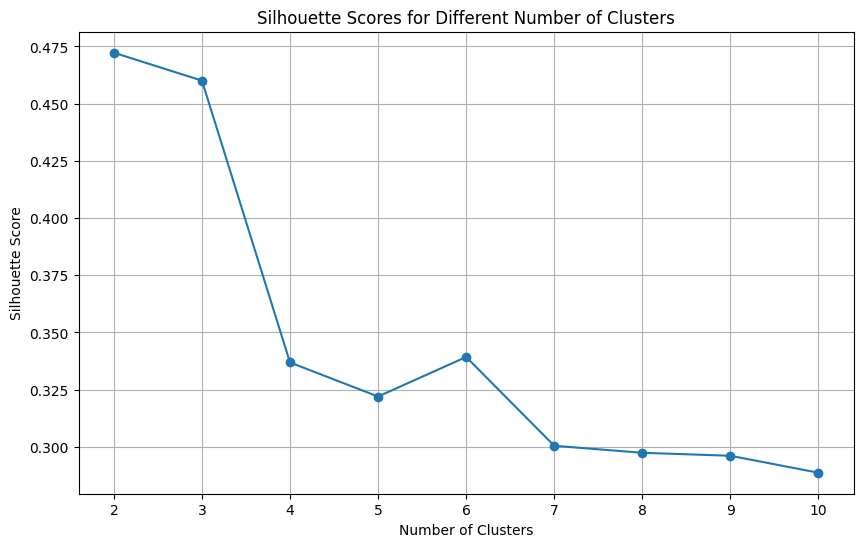

In [25]:
#Determine the ideal number of clusters using the elbow method and the silhouette coefficient

# Silhouette Coefficient
silhouette_scores = []
for k in range(2, 11):
    kmeans_obj = KMeans(n_clusters=k, random_state=1).fit(clust_data1)
    silhouette_avg = silhouette_score(clust_data1, kmeans_obj.labels_)
    silhouette_scores.append(silhouette_avg)
# Plotting the silhouette scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

In [26]:
#Visualize the results of the elbow method

# Elbow Method for Center, Point Forward, and Shooting Forward
css = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(clust_data1)
    css.append(kmeans.inertia_)
               
elbow_data = pd.DataFrame({'Clusters': range(2, 11), 'CSS': css})
fig = px.line(elbow_data, x='Clusters', y='CSS', title='Elbow Method for Optimal Clusters',
                 labels={'Clusters': 'Number of Clusters', 'CSS': 'Total Sum of Squares'})
fig.show()

In [29]:
#Use the recommended number of cluster (assuming it's different) to retrain your model and visualize the results

# Assuming the recommended number of clusters is 3 for the Center, Point Forward, and Shooting Forward
kmeans_obj1 = KMeans(n_clusters=4, random_state=1).fit(clust_data1)
NBA['Cluster'] = kmeans_obj1.labels_
fig = px.scatter_3d(NBA, x='FG', y='AST', z='TRB', color=kmeans_obj1.labels_,
                     title='NBA Players Clustering',
                     labels={'FG': 'Field Goals', 'AST': 'Assists', 'TRB': 'Total Rebounds'},
                     color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()

In [30]:
#Once again evaluate the quality of the clustering using total variance explained and silhouette scores
print("Cluster Evaluation:")
# Total Variance Explained and Silhouette Score for  Center, Point Forward, and Shooting Forward
# Total Variance Explained
total_sum_squares = np.sum((clust_data1 - np.mean(clust_data1))**2)
total = np.sum(total_sum_squares)
between_SSE = (total-kmeans_obj1.inertia_)
var_explained = between_SSE/total
print(f'Total Variance Explained: {var_explained}')
# Silhouette Score
silhouette_avg = silhouette_score(clust_data1, kmeans_obj1.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Cluster Evaluation:
Total Variance Explained: 0.7311622765220694
Silhouette Score: 0.33689040253226216


/home/vscode/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [34]:
NBA.head()

,Player,Pos,Age,Tm,G,MP,FG,3P,2P,eFG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,ï»¿Player,Salary,Cluster
0,Precious Achiuwa,C,22,TOR,73,23.6,3.6,0.8,2.9,0.486,...,6.5,1.1,0.5,0.6,1.2,2.1,9.1,Precious Achiuwa,2840160.0,1
1,Steven Adams,C,28,MEM,76,26.3,2.8,0.0,2.8,0.547,...,10.0,3.4,0.9,0.8,1.5,2.0,6.9,Steven Adams,17926829.0,0
2,Bam Adebayo,C,24,MIA,56,32.6,7.3,0.0,7.3,0.557,...,10.1,3.4,1.4,0.8,2.6,3.1,19.1,Bam Adebayo,30351780.0,0
3,Santi Aldama,PF,21,MEM,32,11.3,1.7,0.2,1.5,0.424,...,2.7,0.7,0.2,0.3,0.5,1.1,4.1,Santi Aldama,2094120.0,2
6,Nickeil Alexander-Walker,SG,23,UTA,15,9.9,1.1,0.7,0.4,0.438,...,1.5,1.1,0.3,0.3,0.5,1.0,3.5,Nickeil Alexander-Walker,5009633.0,2


In [37]:
#Use the model to select players for Mr. Rooney to consider
def undervalued_players(cluster, num_players):
    df = NBA[NBA['Cluster'] == cluster].copy()
    # Using a performance score 
    df['Performance'] = df['FG'] + df['AST'] + df['TRB']
    # Using performance per salary
    df['Value'] = df['Performance'] / df['Salary']
    # Select top players by value
    players = df.nlargest(num_players, 'Value')
    return players[['Player', 'Salary', 'FG', 'AST', 'TRB', 'Value']]
players = undervalued_players(0, 10)
print("Top 5 Undervalued Players:")
print(players)

Top 5 Undervalued Players:
                Player      Salary   FG  AST   TRB     Value
131       Drew Eubanks   1836090.0  6.2  1.6   8.5  0.000009
123     Andre Drummond   3200000.0  5.0  1.4  10.3  0.000005
442     Isaiah Stewart   3433320.0  3.5  1.2   8.7  0.000004
436        Jalen Smith   4670160.0  5.1  0.8   7.6  0.000003
465  Jarred Vanderbilt   4374000.0  2.9  1.3   8.4  0.000003
31      Scottie Barnes   7644600.0  6.2  3.5   7.5  0.000002
337        Evan Mobley   8478720.0  6.1  2.5   8.3  0.000002
380       Jakob Poeltl   9398148.0  6.0  2.8   9.3  0.000002
379      Mason Plumlee   9080417.0  2.8  3.1   7.7  0.000001
386       Bobby Portis  10843350.0  5.8  1.2   9.1  0.000001


In [36]:
# Bad choices players
def overvalued_players(cluster, num_players):
    df = NBA[NBA['Cluster'] == cluster].copy()
    # Using a performance score 
    df['Performance'] = df['FG'] + df['AST'] + df['STL']
    # Using performance per salary
    df['Value'] = df['Performance'] / df['Salary']
    # Select bad players by value
    players = df.nsmallest(num_players, 'Value')
    return players[['Player', 'Salary', 'FG', 'TRB', 'AST', 'Value']]
players = overvalued_players(2, 5)
print("Top 5 Overvalued Players:")
print(players)

Top 5 Overvalued Players:
              Player     Salary   FG  TRB  AST         Value
252        Kai Jones  2909040.0  0.4  0.5  0.2  2.062536e-07
437   Jaden Springer  2125200.0  0.5  1.0  0.0  2.352720e-07
449     Tyrell Terry  1782621.0  0.5  0.0  0.0  2.804859e-07
282   Romeo Langford  5634257.0  1.0  1.0  0.5  3.194742e-07
426  Marko Simonovic  1563518.0  0.4  1.1  0.0  3.197916e-07


Answer: 
* Examples that are not good choices (3 or 4) 
  * Kai Jones, Romeo Langford, Jaden Springer
* Several options that are good choices (3 or 4)
  * Drew Eubanks, Jalen Smith, Scottie Barnes
* Several options that could work, assuming you can't get the players in the good category (3 or 4)
  * Andre Drumond, Isiah Stewart, Jarred Vanderbilt

In [70]:
#Write up the results in a separate notebook with supporting visualizations and an overview of how and why
#you made the choices you did. This should be at least 500 words and should be written for a non-technical audience.


